<a href="https://colab.research.google.com/github/desislava-tancheva/Projects/blob/main/Exploratory_Data_Analysis_Traffic_Accidents_in_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import ast
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import scipy.stats as stats

# Traffic Accidents and Police Stops in Los Angeles #
## Is traffic law enforcement by police enough to prevent traffic collisions? 
## When and where are collisions most likely to occur? Which communities are most at risk of fatalities?

### Abstract

Many people lose their life in traffic accidents every year, while police resources are not allocated properly to deal with this problem worldwide. A comprehensive data about those processes is collected by the Los Angeles Police Department for the period 2010-2019 and in this work the data is used to make conclusions about aspects regarding traffic collisions such as when, where and to whom are accidents more likely to occur in Los Angeles. The idea that traffic law enforcement by the police eases the sevirity and amout of crashes is also introduced and investigated. The results show that the most dangerous parts of the city are located in it's central and south area, while the busiest part of the day after the end of the workday (17.00h) has shown a peak in collisions. The most affected people are from Hispanic/Latin/Mexican descent and the average age of victims is 41 years. A positive correlation between the presence of police on the road measured by police stops of vehicles and the traffic collisions has been found, which indicates that the police activities may have been allocated as a response to trends in collisions in certain parts of the day, but the relationship between the two should be further looked into. 

### Introduction

The goal of the following analisys is to reveal patterns in data regarding traffic collisions and police stops in Los Angeles within the last 10 years. The focus of the analysis is to find out wether the presence of police on the roads is related to the amount of traffic accidents. Another ponit is to show the most common time and place for traffic accidents in Los Angeles, as well as weather certain societal groups are more affected by this problem than others. Based on this information road safety could be improved and the revealed problems addressed directly.

Police activities should primarily serve as deterrence for drivers inclined to commit traffic offences through increasing road 
users’ perception of the risk of being caught [1]. In this work, traffic regulation enforcement is measured by the amount of police stops of vehicles in the city. Though the reason and repercussions of the stops and checks are not part of the analysis, police activity on the roads could have an effect on risky behaviour of drivers and therefore prevent collisions and save lives. 

It is also benefitical to know the most dangerous areas of the city and the parts of the day when the most crashes occur, in order to allocate police resources accordingly. Furthermore, having an understanding of the profile of people that fall victims of crashes is a basis to provide those groups with information and guidance to prevent them from becoming part of this grim statistic. The measures of public education and information campaigns have proven to be highly effective when they accompany laws and law enforcement as stated by the World Health Organisation [2].

### Reading and cleaning the data 

#### Traffic Collision Dataset

The dataset holds information about treffic collisions in Los Angeles in the period 2010-2019. It can be found at https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data.

In [ ]:
collision_data = pd.read_csv('data/traffic-collision-data-from-2010-to-present.csv')

In [ ]:
collision_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,...,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,...,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,...,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,0605,...,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,...,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0


In [ ]:
collision_data.shape

(502858, 24)

There are 502858 records in the dataset and 24 columns. Let's take a closer look at the 24 columns and filter out the ones that are not related to the aim of this analysis or might be unclear and ambiguous. Some of the colum headers are self explanatory, but for others the description taken from the metadata will be provided.

#### Data Dictinary

- DR Number	- Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
- Date Reported	
- Date Occurred	
- Time Occurred	- In 24 hour military time
- Area ID	
- Area Name
- Reporting District - A code used in producing reports to group data into geographic sub-areas within an area
- Crime Code - Indicates the crime committed. For this dataset - all Crime Code 997
- Crime Code Description	
- MO Codes - Modus Operandi: Activities associated with the suspect in commission of the crime
- Victim Age
- Victim Sex
- Victim Descent -  A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
- Premise Code - The type of structure or location where the incident took place
- Premise Description
- Address
- Cross Street	
- Location	
- Zip Codes	
- Census Tracts	
- Precinct Boundaries	
- LA Specific Plans	
- Council Districts	
- Neighborhood Councils (Certified)

1. Reducing number of variables

Before cleaning the data, let's reduce the number of columns and leave only the ones that are needed or give relevant information. The study is particularty lnterested in time and location of the collision as well as the victim's profile. For that reason we will filter only the columns that give this information and rename them for easier access. 

In [ ]:
relevant_columns = ['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred', 'Area Name', 'Location', 'Victim Age', 'Victim Sex', 'Victim Descent']

In [ ]:
collision_data = collision_data[relevant_columns]

In [ ]:
collision_data.columns = ['file_number', 'date_reported', 'date_occurred', 'time_occurred', 'area', 'location', 'victim_age', 'victim_sex', 'victim_descent']

In [ ]:
collision_data.head()

,file_number,date_reported,date_occurred,time_occurred,area,location,victim_age,victim_sex,victim_descent
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,Newton,"{'longitude': '-118.2696', 'human_address': '{...",NaN,F,H
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,Olympic,"{'longitude': '-118.3031', 'human_address': '{...",40.0,M,W
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,Foothill,"{'longitude': '-118.2704', 'human_address': '{...",18.0,M,W
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,Southeast,"{'longitude': '-118.2739', 'human_address': '{...",23.0,M,H
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,Foothill,"{'longitude': '-118.3703', 'human_address': '{...",NaN,M,H


Let's take a look at the file_number column. The metadata file indicates that there are less unique values than rows, but it is supposeed to be unique, which indicates dupplicated records. To be sure let's count the occurrances of every file number and print some rows that has the same key.

In [ ]:
collision_data.file_number.value_counts()

151216282    2
151017417    2
171923457    2
180910079    2
100909953    2
            ..
141119103    1
191805056    1
150908547    1
140416644    1
110704763    1
Name: file_number, Length: 501970, dtype: int64

In [ ]:
collision_data[collision_data.file_number == 151216282]

,file_number,date_reported,date_occurred,time_occurred,area,location,victim_age,victim_sex,victim_descent
249978,151216282,2015-06-30T00:00:00.000,2015-06-30T00:00:00.000,1815,77th Street,"{'longitude': '-118.3003', 'human_address': '{...",23.0,M,A
250104,151216282,2015-06-30T00:00:00.000,2015-06-30T00:00:00.000,1815,77th Street,"{'longitude': '-118.3003', 'human_address': '{...",23.0,M,A


Many records have the same file number and the rows contain the same information. We need to remove those duplicates. This reduces the dataset with about 1000 records.

In [ ]:
collision_data = collision_data.drop_duplicates()

In [ ]:
collision_data.shape

(501970, 9)

In [ ]:
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501970 entries, 0 to 502857
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_number     501970 non-null  int64  
 1   date_reported   501970 non-null  object 
 2   date_occurred   501970 non-null  object 
 3   time_occurred   501970 non-null  int64  
 4   area            501970 non-null  object 
 5   location        501970 non-null  object 
 6   victim_age      423400 non-null  float64
 7   victim_sex      494368 non-null  object 
 8   victim_descent  493578 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 38.3+ MB


We can see that the information about the victims has quite a lot missing values, but he volume of the data allows us to remove those records, because they are around 2% of all. That leaves us only with records of collisions that resulted in death of someone involved.

In [ ]:
collision_data = collision_data.dropna()

In [ ]:
collision_data.head()

,file_number,date_reported,date_occurred,time_occurred,area,location,victim_age,victim_sex,victim_descent
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,Olympic,"{'longitude': '-118.3031', 'human_address': '{...",40.0,M,W
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,Foothill,"{'longitude': '-118.2704', 'human_address': '{...",18.0,M,W
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,Southeast,"{'longitude': '-118.2739', 'human_address': '{...",23.0,M,H
5,191824078,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1050,Southeast,"{'longitude': '-118.2463', 'human_address': '{...",54.0,F,B
6,190417458,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,Hollenbeck,"{'longitude': '-118.2242', 'human_address': '{...",33.0,F,B


In [ ]:
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421491 entries, 1 to 502857
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_number     421491 non-null  int64  
 1   date_reported   421491 non-null  object 
 2   date_occurred   421491 non-null  object 
 3   time_occurred   421491 non-null  int64  
 4   area            421491 non-null  object 
 5   location        421491 non-null  object 
 6   victim_age      421491 non-null  float64
 7   victim_sex      421491 non-null  object 
 8   victim_descent  421491 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.2+ MB


Now let's correct the datatypes of some columns. The columns regarding the date and time should be corrected, the rest look fine. date_reported and date_ocurred must be converted to datetime, and time_occurred split by hours and minutes. For time let's create a column containing only the hour, because the minutes are uneccesarry precision for this analysis. We'll also split the date in other two columns - month and year for easier aggregation later.

In [ ]:
collision_data.date_reported = pd.to_datetime(collision_data.date_reported)
collision_data.date_occurred = pd.to_datetime(collision_data.date_occurred)

In [ ]:
collision_data['hour'] = collision_data.time_occurred.astype('str').str.slice(0,-2)
collision_data.loc[collision_data['hour'] == '', 'hour'] = '0'
collision_data['hour'] = collision_data['hour'].astype('int64')

In [ ]:
collision_data['day'] = pd.DatetimeIndex(collision_data['date_occurred']).day
collision_data['month'] = pd.DatetimeIndex(collision_data['date_occurred']).month
collision_data['year'] = pd.DatetimeIndex(collision_data['date_occurred']).year

In [ ]:
# make string value into dictionary 
collision_data['location'] = [ast.literal_eval(d) for d in collision_data['location']]

In [ ]:
# get longitude and latitude from dictionary and add them as columns to the dataframe 
collision_data['longitude'] = [d['longitude'] for d in collision_data['location']]
collision_data['latitude'] = [d['latitude'] for d in collision_data['location']]

In [ ]:
# parse longitude and latitude columns to float64
collision_data.longitude = collision_data.longitude.astype(float)
collision_data.latitude =  collision_data.latitude.astype(float)

In [ ]:
collision_data = collision_data.drop(['date_reported','date_occurred', 'time_occurred', 'location'], axis = 1)

In [ ]:
collision_data.head()

,file_number,area,victim_age,victim_sex,victim_descent,hour,day,month,year,longitude,latitude
1,192020666,Olympic,40.0,M,W,0,30,11,2019,-118.3031,34.0526
2,191616992,Foothill,18.0,M,W,2,30,11,2019,-118.2704,34.2339
3,191824082,Southeast,23.0,M,H,7,30,11,2019,-118.2739,33.9572
5,191824078,Southeast,54.0,F,B,10,30,11,2019,-118.2463,33.9368
6,190417458,Hollenbeck,33.0,F,B,1,30,11,2019,-118.2242,34.0720


Now it all looks good. Let's move on to the next dataset about police stops.

#### Vehicle and pedestrian stop Dataset

The following dataset presents data about vehichles and pedestrians being stopped by the LA police department in the same period between 2010-2019. This will be used as a proxy of when the police presence is most prevalent. It is available at https://www.kaggle.com/cityofLA/los-angeles-vehicle-pedestrian-stop-data?select=vehicle-and-pedestrian-stop-data-2010-to-present.csv

In [ ]:
police_data = pd.read_csv('data/vehicle-and-pedestrian-stop-data-2010-to-present.csv', dtype = 'object')

In [ ]:
police_data.head()

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,Officer 2 Serial Number,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator
0,13521622,30213936,M,H,HISPANIC,1900-01-01T00:00:00.000,13:59,23085,07,WILSHIRE,61529,07,WILSHIRE,0753,PED,Y
1,7793251,10282306,M,H,HISPANIC,2010-01-01T00:00:00.000,20:30,26372,21,TOPANGA,NaN,NaN,NaN,2137,VEH,Y
2,7793109,10282188,M,W,WHITE,2010-01-01T00:00:00.000,18:20,16058,27,WEST TRAFFIC,NaN,NaN,NaN,1494,VEH,N
3,7792818,10281970,F,B,BLACK,2010-01-01T00:00:00.000,11:20,26388,24,CENTRAL TRAFFIC,NaN,NaN,NaN,1171,VEH,N
4,7793225,10282287,F,W,WHITE,2010-01-01T00:00:00.000,18:55,25095,27,WEST TRAFFIC,NaN,NaN,NaN,648,VEH,N


#### Data Dictionary

- Stop Number -  A unique identifier for the event record. (Therefore it can be used as an index column).
- Form Reference Number
- Sex Code                      
- Descent Code - A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian               
- Descent Description            
- Stop Date                     
- Stop Time                     
- Officer 1 Serial Number       
- Officer 1 Division Number     
- Division Description 1       
- Officer 2 Serial Number       
- Officer 2 Division Number     
- Division Description 2       
- Reporting District           
- Stop Type - Either Vehicle (VEH) or Pedestrian (PED).                    
- Post Stop Activity Indicator - Identifies whether there was further activity after the stop was made.

Let's only leave relevant columns and filter the stop type by "VEH", because pedestriant stops are not part of the analysis.

In [ ]:
columns_to_keep = ['Stop Date', 'Stop Time', 'Stop Type']

In [ ]:
police_data = police_data[columns_to_keep]

In [ ]:
police_data.columns = ['stop_date', 'stop_time', 'stop_type']

In [ ]:
police_data = police_data[police_data.stop_type == 'VEH']

In [ ]:
police_data.head()

,stop_date,stop_time,stop_type
1,2010-01-01T00:00:00.000,20:30,VEH
2,2010-01-01T00:00:00.000,18:20,VEH
3,2010-01-01T00:00:00.000,11:20,VEH
4,2010-01-01T00:00:00.000,18:55,VEH
5,2010-01-01T00:00:00.000,11:00,VEH


In [ ]:
police_data = police_data.drop('stop_type', axis = 1)

In [ ]:
police_data.stop_time.isna().sum()

0

Let's remove duplicate rows if there are any.

In [ ]:
police_data = police_data.drop_duplicates()

In [ ]:
police_data.shape

(1445173, 2)

Let's extract the hour when those stops occured as we did with the previous dataset.

In [ ]:
police_data['hour'] = police_data['stop_time'].str.slice(0,-3).astype('int64')

And again the same transformation of dates in datetime, as well as extracting the year in a seperate column.

In [ ]:
police_data.stop_date = pd.to_datetime(police_data.stop_date)

In [ ]:
police_data['year'] = pd.DatetimeIndex(police_data.stop_date).year

In [ ]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445173 entries, 1 to 7499183
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   stop_date  1445172 non-null  datetime64[ns]
 1   stop_time  1445173 non-null  object        
 2   hour       1445173 non-null  int64         
 3   year       1445172 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 55.1+ MB


In [ ]:
police_data.head()

,stop_date,stop_time,hour,year
1,2010-01-01,20:30,20,2010.0
2,2010-01-01,18:20,18,2010.0
3,2010-01-01,11:20,11,2010.0
4,2010-01-01,18:55,18,2010.0
5,2010-01-01,11:00,11,2010.0


It all looks satisfactory. Now let's move on to exploration and visualization of the clean data

### Data Exploration and Visualization

In this section some surious questions will be answered trough visualizations and statistical methods.

- At what part of the day do most accidents occur?

Answer: 17:00 h.

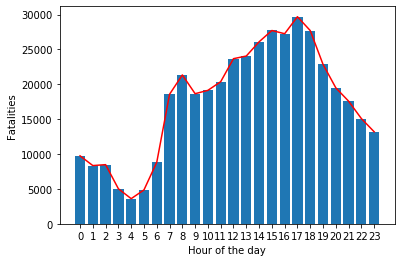

In [ ]:
plt.bar(collision_data.hour.value_counts(sort=False).index, collision_data.hour.value_counts(sort=False))
plt.plot(collision_data.hour.value_counts(sort=False).index, collision_data.hour.value_counts(sort=False), color = 'red')
plt.xticks(range(0,24))
plt.xlabel('Hour of the day')
plt.ylabel('Fatalities')
plt.show()

- In which LA areas do the most collisions happend?

Answer: 77th Street

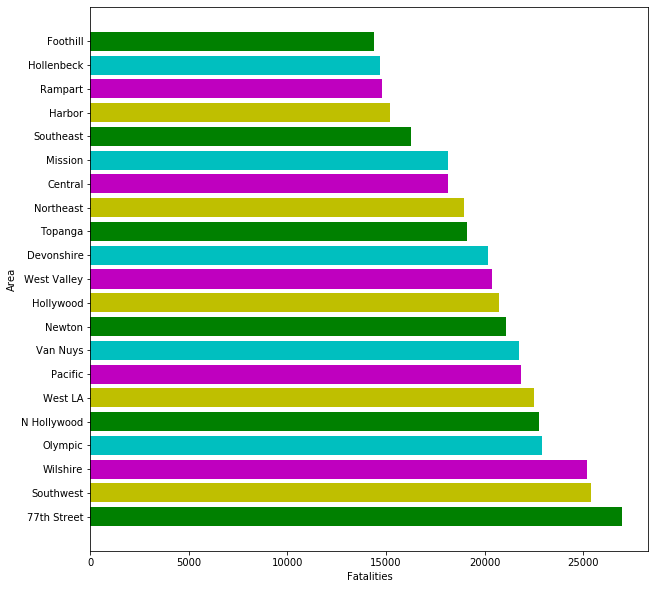

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(collision_data["area"].value_counts().index,collision_data["area"].value_counts(), color = list('gymc'))
plt.xlabel('Fatalities')
plt.ylabel('Area')
plt.show()

Here's a map of Los Angeles where every red dot represents a victim of a car crash. It shows that the density of fatalities is greater in central and south Los Angeles.

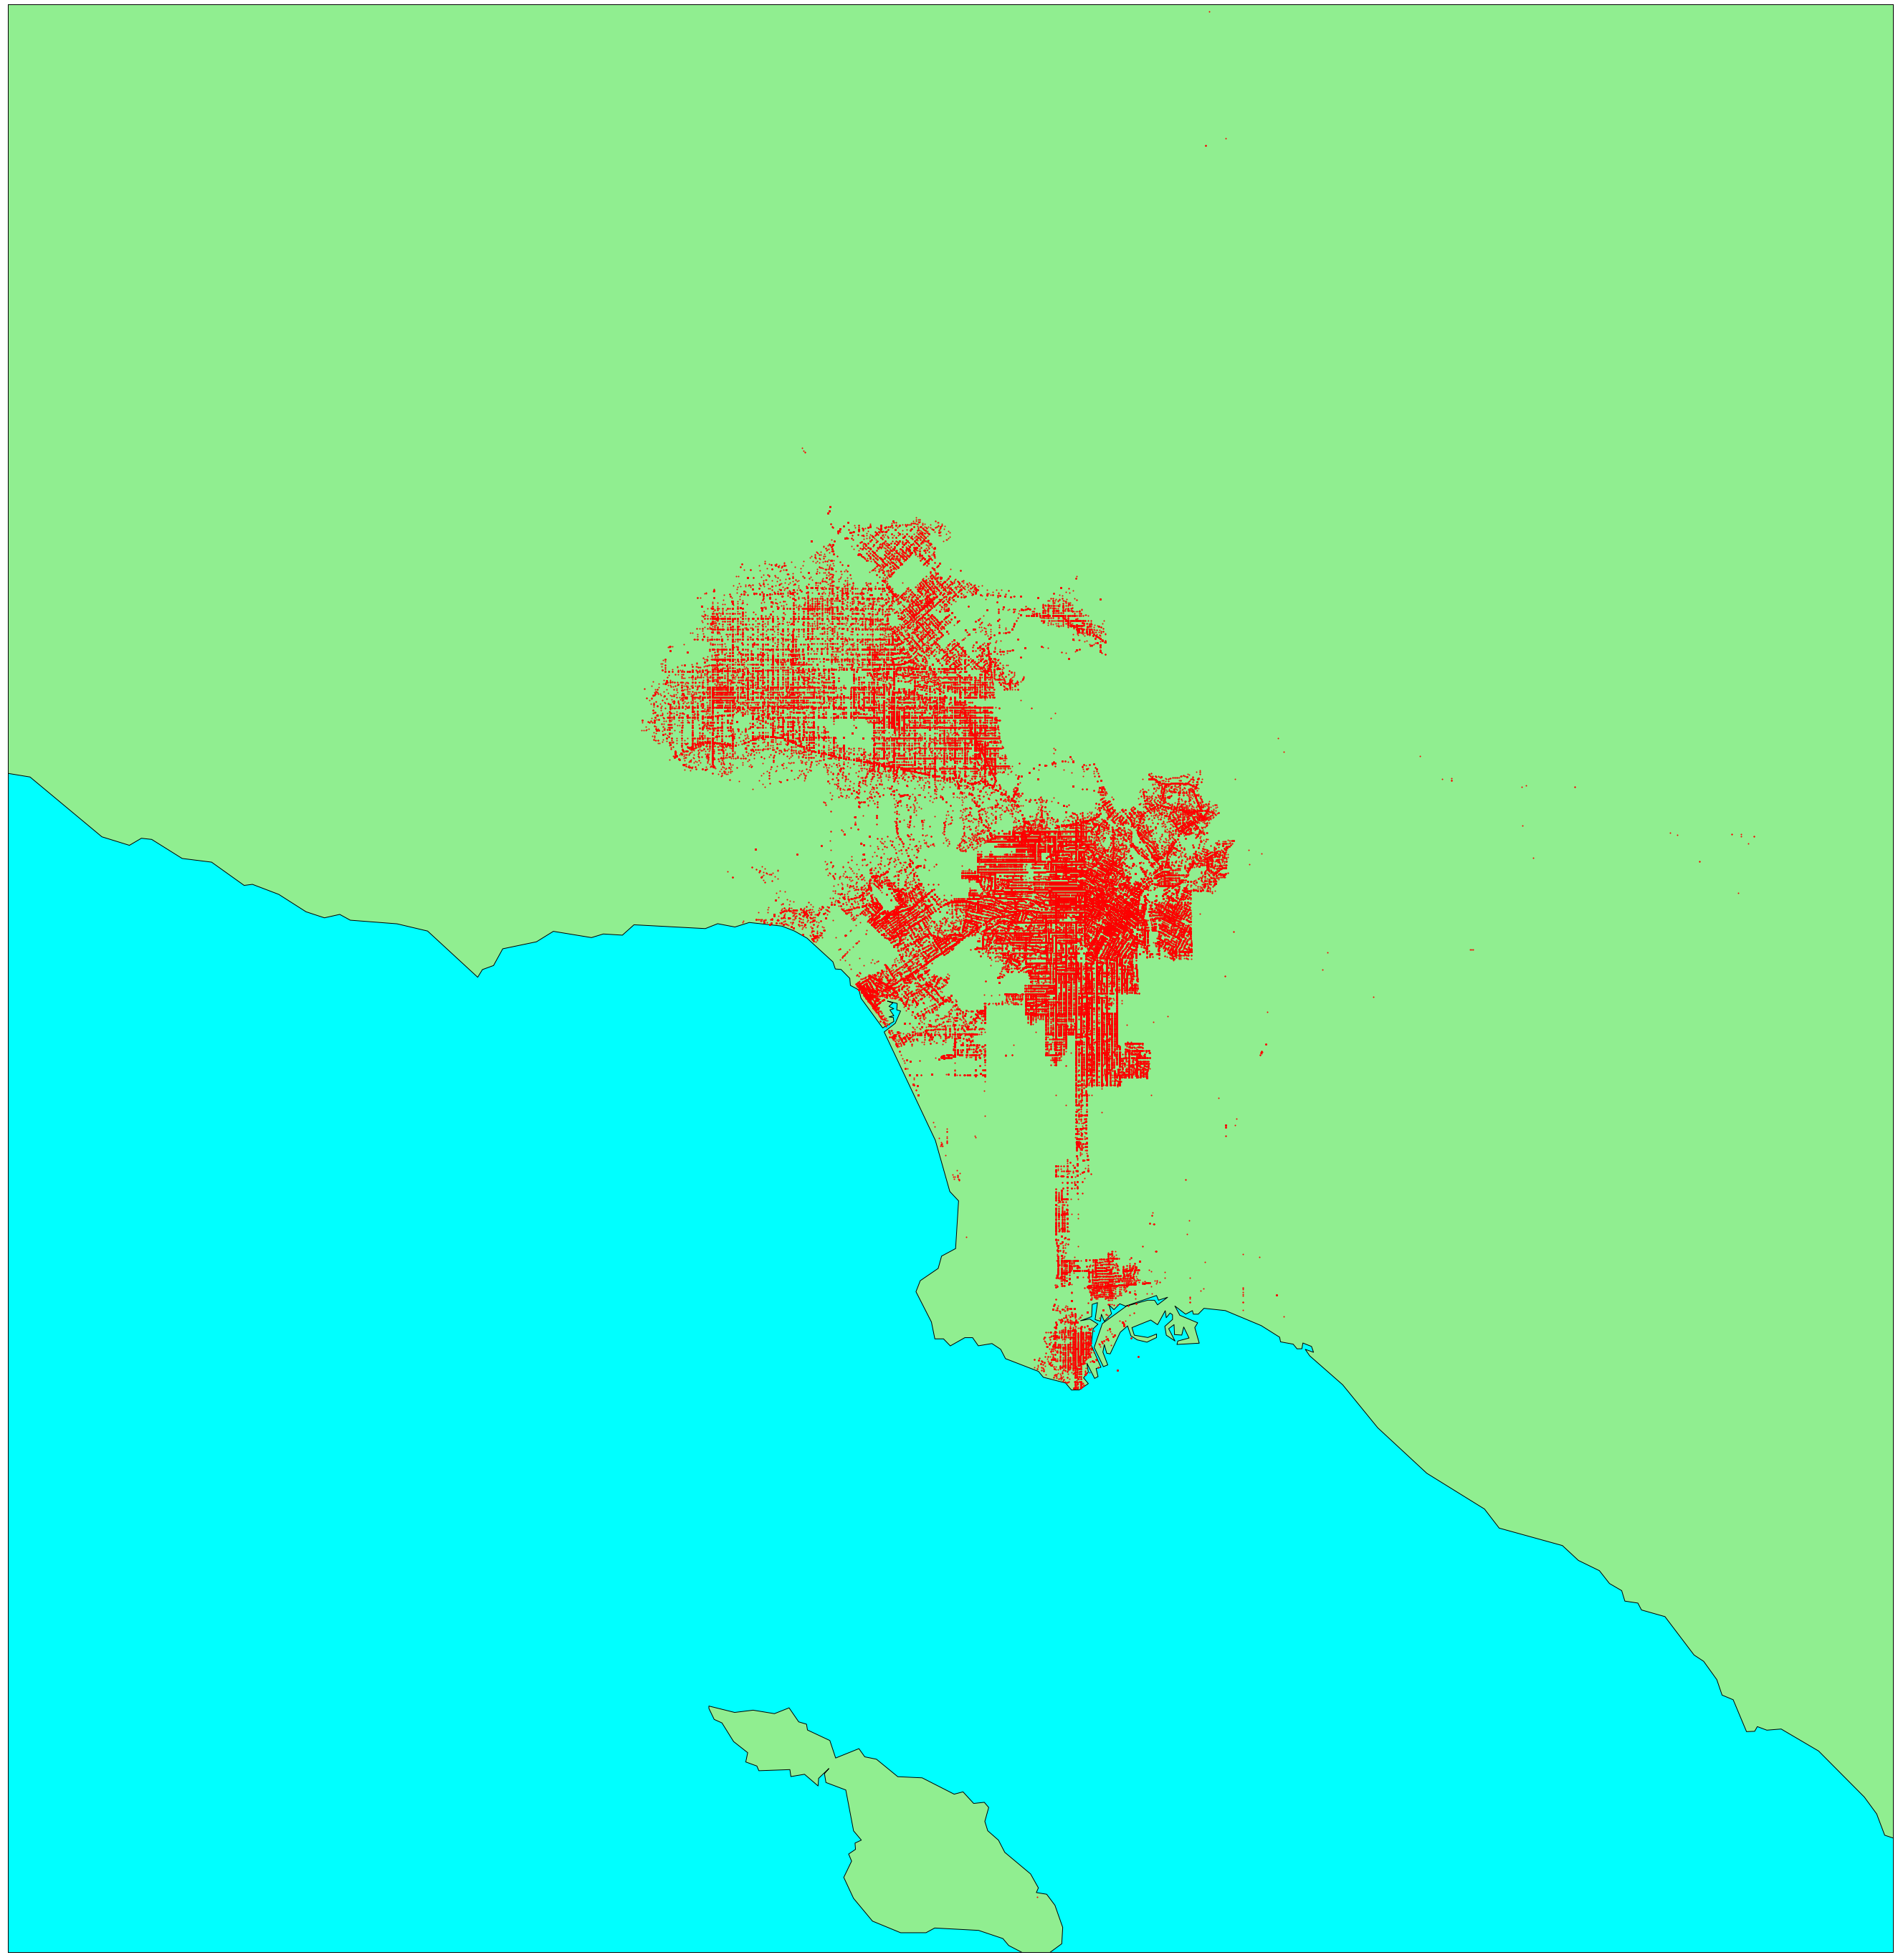

In [ ]:
plt.figure(figsize = (50, 50))
la = Basemap(projection='lcc', resolution='h', 
            lat_0=34, lon_0=-118.4,
            width=0.15E6, height=0.155E6)
x, y = la(collision_data['longitude'].tolist(), collision_data['latitude'].tolist())
la.plot(x, y,"o", markersize = 1 , color = 'red')
la.drawcoastlines()
la.drawcountries()
la.drawstates()
la.fillcontinents(color = "lightgreen", lake_color = "aqua")
la.drawmapboundary(fill_color = "aqua")
plt.show()

- What is the average age of the victims?

Answer: 41 years

In [ ]:
collision_data.victim_age.mean()

41.4376605906176

- Do more man or women fall victims to crashes?

Answer: Slightly more men than women are victims of crashes.

In [ ]:
women = (collision_data.victim_sex == 'F').sum() 
men = (collision_data.victim_sex == 'M').sum()

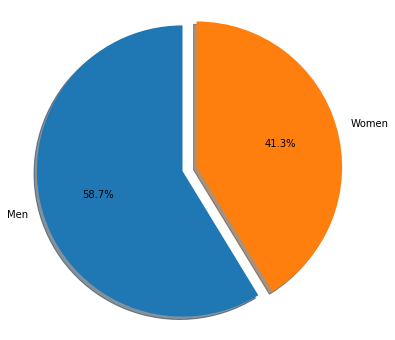

In [ ]:
labels = 'Men', 'Women'
sizes = [men, women]
explode = (0, 0.1) 

plt.figure(figsize = (6, 6))
plt.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 

plt.show()

- What are the three most affected groups acorrding to their background?

1) H - Hispanic/Latin/Mexican

2) W - White 

3) B - Black

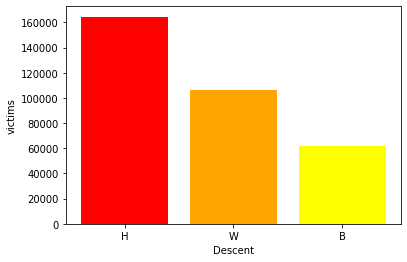

In [ ]:
plt.bar(collision_data.victim_descent.value_counts().head(3).index, collision_data.victim_descent.value_counts().head(3).values, color=['red', 'orange', 'yellow'])
plt.xlabel('Descent')
plt.ylabel('victims')
plt.show()

This alarming leading position of Hispanic/Latin/Mexican victims compared to others can be explained by the fact that in 2017 49% of the population of Los Angeles is from said backround as opposed to 28% White and 9% Black, acoording to Los Angeles City Planning [3]. 

Based on this visualizations we can conclude that the most affected by crashes societal group in the past 10 years are Hispani/Latin/Mexican middle agned men. The most dangerous part of the day is 17.00h or around the end of the workday and the areas that need more regulations are mainly in central and south LA, especially 77th Street.

### Hypothesis testing

Let's try to see if the police presence (more police vehicle stops by year) has a linear relationship with number of traffic collisions victims by the hour. 

H0: There's no correlation between police stops and traffic collisions.

H1: There's correlation between the two variables.

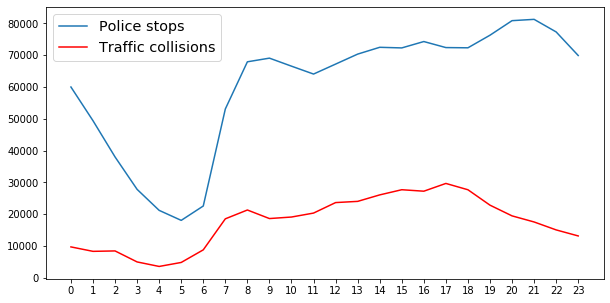

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(police_data['hour'].value_counts(sort=False))
plt.plot(collision_data['hour'].value_counts(sort=False), color = 'red')
plt.xticks(range(0,24))
plt.legend(('Police stops', 'Traffic collisions'), fontsize = 'x-large')
plt.show()

We can see that the two variables follow a similar trend. Let's check their correlation coefficient.

In [ ]:
hourly_police_stops = police_data['hour'].value_counts(sort=False)
hourly_collisions = collision_data['hour'].value_counts(sort=False)

In [ ]:
stats.pearsonr(hourly_police_stops, hourly_collisions)

(0.8003785200528508, 2.6553512828962266e-06)

The correlation between police stops and traffic accidents is 80% with a very small pvalue, practically 0. This means that the Null hypothesis can be rejected and that the traffic control in Los Angeles is well adapted to the demands of the city. 

We see a high positive correlation, which means that parts of the day when more collisions happen the activity of the police increasees accordingly. However, we have not proven that there is a causality between the two, but a curious relationship has been revealed that should be further investigated.

### References

[1]  Siegrist, Stefan. "Police Enforcement Strategies to Reduce Traffic Casualties in Europe", 1999

[2]  World Health Organization. "World report on road traffic injury prevention: Summary", 2004

[3]  Los Angeles City Planning. "Demographics", 2017 Retrieved from https://planning.lacity.org/resources/demographics